<a href="https://colab.research.google.com/github/LeMagnifiq/HousePricePrediction/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Real Estate: Predicting Housing Prices in King County**

This project revolves around the application of machine learning techniques to predict house prices in King County. Various regression models, including Linear Regression, Ridge, Lasso, and Random Forest, are utilized and optimised through hyperparameter tuning. The ultimate aim is to develop an effective predictive model that can generate accurate house price estimates. The model's outputs should shed light on the factors most instrumental in determining house prices within the King County real estate market.

## **Calling the Kaggle dataset API**

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lemagnifiq","key":"8d03255afa4acff15e58b719f0ee8da4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d harlfoxem/housesalesprediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 140MB/s]


In [5]:
!unzip housesalesprediction.zip

Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [6]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the Data**

In [7]:
data = pd.read_csv('kc_house_data.csv')

## **Quick Examination**

In [8]:
#The first few rows of the dataset
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [9]:
#Structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
#Statistical summary of the dataset
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [11]:
#Check for Missing Values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## **Key Insights and Observationsfrom Housing Data**

## **Location**

### **Average Prices by Zipcode**

In [12]:
data.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
             ...     
98148    2.849086e+05
98001    2.808047e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64

This indicates the zipcodes with the most expensive houses on average and those with the least expensive houses on average. Specifically, the zipcode 98039 has the highest average house price, around $2.16 million. On the other hand, the zipcode 98002 has the lowest average house price, about $234,284.

### **Plotting Latitude and Longitude**

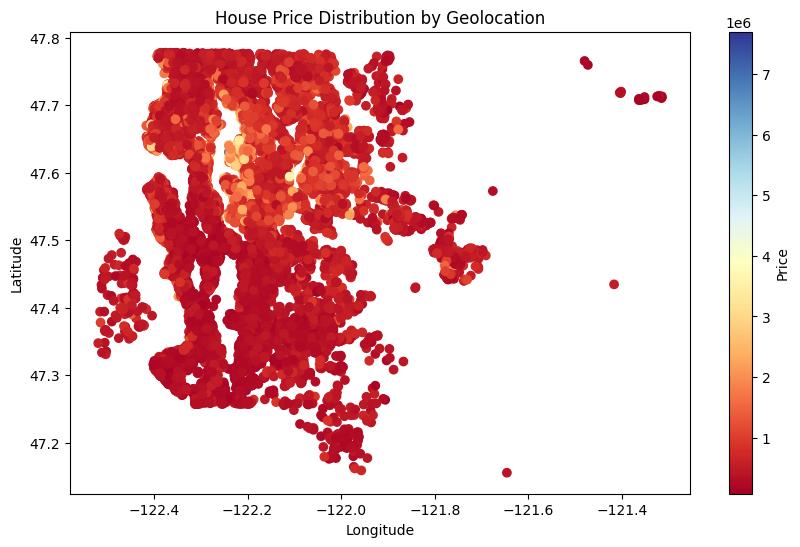

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data['long'], data['lat'], c=data['price'], cmap='RdYlBu')
plt.colorbar().set_label('Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Price Distribution by Geolocation')
plt.show()

### **Expensive and Cheapest Areas**

In [14]:
avg_prices = data.groupby('zipcode')['price'].mean()
print("Most Expensive Areas:\n", avg_prices.nlargest(5))
print("Cheapest Areas:\n", avg_prices.nsmallest(5))

Most Expensive Areas:
 zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
Name: price, dtype: float64
Cheapest Areas:
 zipcode
98002    234284.035176
98168    240328.371747
98032    251296.240000
98001    280804.690608
98148    284908.596491
Name: price, dtype: float64


These results suggest that, on average, houses in zip code 98039 are the most expensive, with an average price of approximately $2.16 million, while houses in zip code 98002 are the least expensive, with an average price of approximately $234,284.

Here's a more formatted output based on your results:

**Top 5 Most Expensive Zipcodes and their Average Prices:**
1. 98039 - $2,160,607
2. 98004 - $1,355,927
3. 98040 - $1,194,230
4. 98112 - $1,095,499
5. 98102 - $901,258

**Top 5 Least Expensive Zipcodes and their Average Prices:**
1. 98002 - $234,284
2. 98168 - $240,328
3. 98032 - $251,296
4. 98001 - $280,805
5. 98148 - $284,909

The average prices are quite diverse across the zipcodes, indicating that the location (zipcode in this case) is indeed a significant factor affecting house prices. The most expensive area is almost ten times as expensive as the least expensive one, which is a substantial difference. This information can be very valuable for potential home buyers, investors, or real estate professionals.

### **Median House Prices**

In [15]:
median_prices = data.groupby('zipcode')['price'].median().sort_values(ascending=False)
print(median_prices)

zipcode
98039    1892500.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
           ...    
98188     264000.0
98001     260000.0
98032     249000.0
98002     235000.0
98168     235000.0
Name: price, Length: 70, dtype: float64


The most expensive median house price is in the 98039 zip code, with a median price of $1,892,500, and the least expensive areas are in the 98002 and 98168 zip codes, both with median prices of "$235,000".

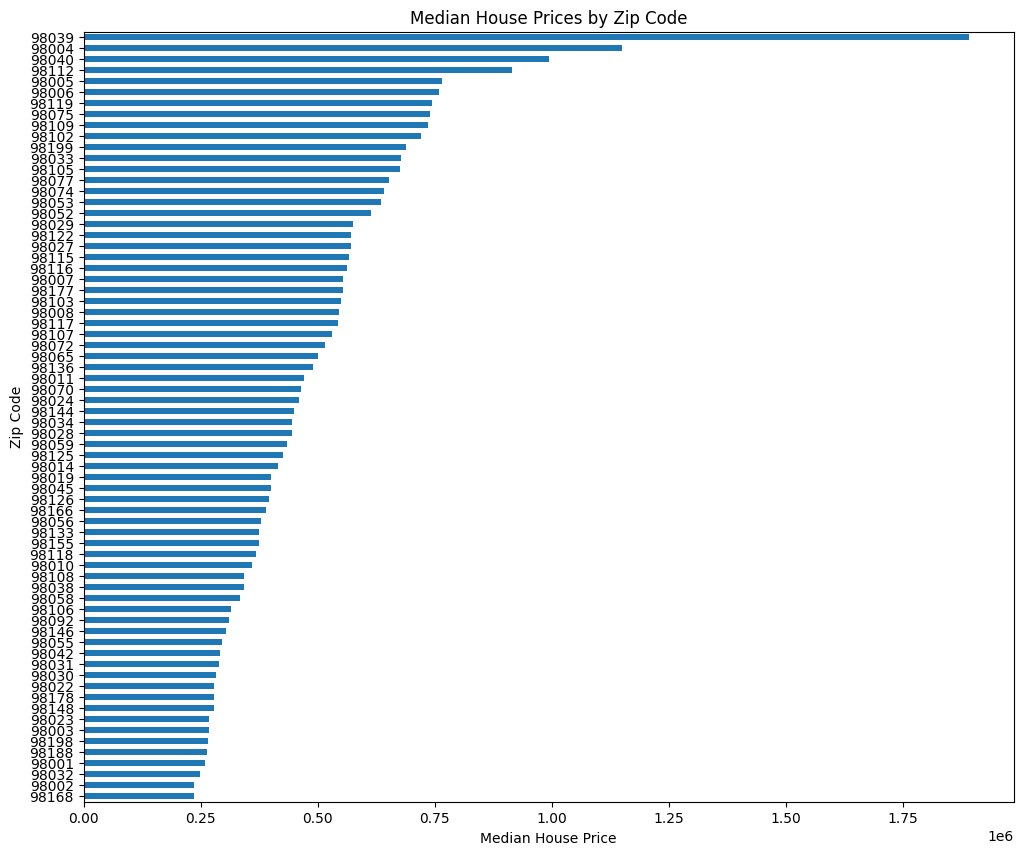

In [16]:
plt.figure(figsize=(12,10))
median_prices.sort_values().plot(kind='barh')
plt.xlabel('Median House Price')
plt.ylabel('Zip Code')
plt.title('Median House Prices by Zip Code')
plt.show()

### **Correlation Analysis**

In [17]:
# Calculate correlations
correlations = data.corr()

# Print the correlation with the 'price' column
print(correlations['price'])


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


<ipython-input-17-95e932790205>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


1. 'sqft_living' (0.702), 'grade' (0.667), and 'sqft_above' (0.606) are the top 3 features positively correlated with the price. This indicates that as the square footage of living space, grade, and square footage above the ground level increase, the price of the house also tends to increase.

2. 'bathrooms' (0.525) and 'sqft_living15' (0.585) also have a fairly strong positive correlation with the price.

3. 'view' (0.397) and 'waterfront' (0.266) are also positively correlated with price, indicating that houses with a view or those located on the waterfront tend to be more expensive.

4. Interestingly, 'yr_built' has a very low correlation (0.054) with price, indicating that the year a house was built doesn't have much of a direct impact on its price.

5. 'zipcode' has a small negative correlation (-0.053) with price, which suggests that there's no straightforward relationship between the area's zipcode and house prices within that area.


### **Time-based analysis**

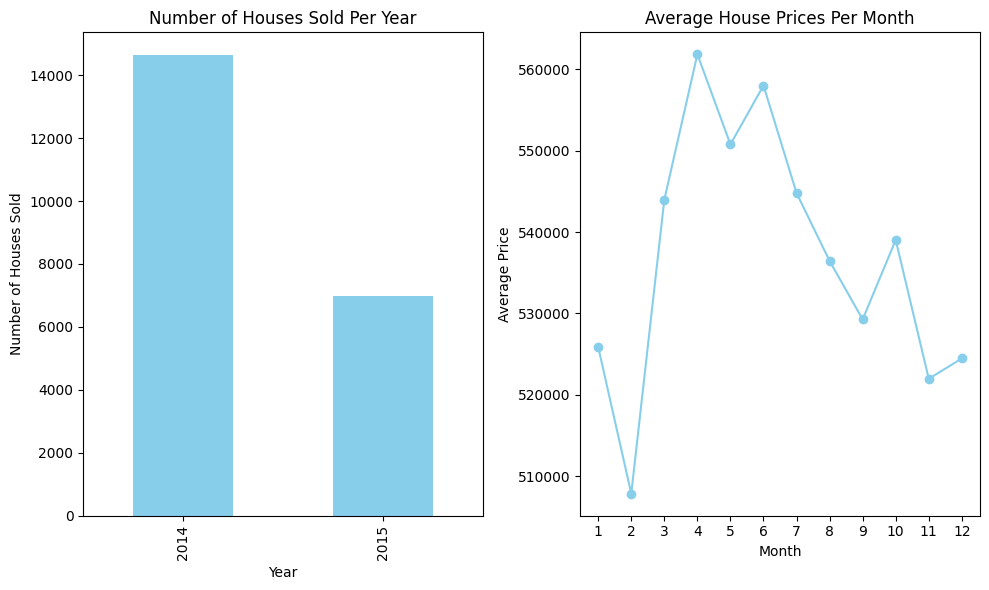

In [18]:
# Converting 'date' to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Extracting year and month from 'date'
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Number of houses sold per year
houses_sold_per_year = data['year'].value_counts().sort_index()

# Average house prices per month
average_price_per_month = data.groupby('month')['price'].mean()

# Visualizing the data
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
houses_sold_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Houses Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Houses Sold')

plt.subplot(1,2,2)
average_price_per_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Average House Prices Per Month')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

### **House Condition & Renovation**

In [19]:
data.groupby('condition')['price'].describe()
data.groupby('grade')['price'].describe()
data['age'] = data['year'] - data['yr_built']  # to create a feature representing the age of the house
data.groupby('age')['price'].describe()
data['years_since_renovation'] = data['year'] - data['yr_renovated']  # similarly for years since renovation
data.groupby('years_since_renovation')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
years_since_renovation,,,,,,,,
-1,6.0,637666.666667,228675.898745,285000.0,503250.0,695000.0,820000.00,850000.0
0,86.0,661498.604651,338040.826727,180000.0,409750.0,604500.0,833750.00,1755000.0
1,45.0,617859.755556,341973.313088,199990.0,356999.0,535000.0,825000.00,1697000.0
2,16.0,766643.750000,519413.384462,330000.0,438125.0,661250.0,888750.00,2500000.0
3,13.0,614880.769231,229862.416765,294000.0,465000.0,577000.0,797000.00,991700.0
...,...,...,...,...,...,...,...,...
70,2.0,388500.000000,187383.297014,256000.0,322250.0,388500.0,454750.00,521000.0
74,2.0,378400.000000,92065.302910,313300.0,345850.0,378400.0,410950.00,443500.0
80,1.0,459950.000000,NaN,459950.0,459950.0,459950.0,459950.00,459950.0


In [20]:
pivot_table = data.pivot_table(values='price', index='condition', columns='grade', aggfunc='mean')

In [21]:
data[['price', 'condition', 'grade', 'age', 'years_since_renovation']].corr()

,price,condition,grade,age,years_since_renovation
price,1.000000,0.036362,0.667434,-0.053951,-0.126426
condition,0.036362,1.000000,-0.144674,0.360665,0.060563
grade,0.667434,-0.144674,1.000000,-0.447415,-0.014449
age,-0.053951,0.360665,-0.447415,1.000000,-0.224459
years_since_renovation,-0.126426,0.060563,-0.014449,-0.224459,1.000000


1. Condition: The correlation between the 'condition' of the house and the 'price' is quite low (0.036362). This suggests that the overall condition of the house might not play a significant role in determining the price.

2. Grade: The 'grade' of a house appears to have a strong positive correlation with the 'price' (0.667434). This indicates that houses with better grades or higher quality tend to have higher prices.

3. Age: The 'age' of the house shows a weak negative correlation with the 'price' (-0.053951). This might suggest that newer houses tend to be slightly more expensive, but the effect is not very strong.

4. Years Since Renovation: This feature has a negative correlation with the 'price' (-0.126426). This suggests that houses that have been renovated more recently may command higher prices. However, again the effect is not very strong.

### **Size Analysis**

In [22]:
# Selecting features of interest
features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Correlation of these features with 'price'
correlations = data[features + ['price']].corr()

# Extract the 'price' row (or column, since the correlation matrix is symmetric)
price_correlations = correlations.loc['price', features]

# Print the correlations
print(price_correlations)


sqft_living      0.702035
sqft_lot         0.089661
sqft_above       0.605567
sqft_basement    0.323816
Name: price, dtype: float64


1. 'sqft_living' has the highest correlation with 'price' (0.702035). This indicates a strong positive correlation, i.e., the price tends to increase as the living space increases.
2. 'sqft_above' also has a fairly strong positive correlation with 'price' (0.605567), which means that the price of the house also increases as the size of its above (ground) portion increases.
3. 'sqft_basement' has a moderate correlation (0.323816), indicating that having a larger basement also contributes to a higher price, but the effect is not as strong as the living space above ground.
4. 'sqft_lot' has the lowest correlation (0.089661). This means that the price of a house does not increase significantly with the size of the lot.

### **Bedrooms & Bathrooms**

In [23]:
data[['price', 'bedrooms', 'bathrooms']].corr()

,price,bedrooms,bathrooms
price,1.000000,0.308350,0.525138
bedrooms,0.308350,1.000000,0.515884
bathrooms,0.525138,0.515884,1.000000


1. Bedrooms: The correlation coefficient between 'price' and 'bedrooms' is 0.308350, suggesting a moderate and positive relationship. This indicates that the price tends to increase as the number of bedrooms increases, but the relationship isn't very strong.

2. Bathrooms: The correlation coefficient between 'price' and 'bathrooms' is 0.525138, suggesting a stronger positive relationship than bedrooms. This indicates that the price tends to increase more significantly with the number of bathrooms in a house.

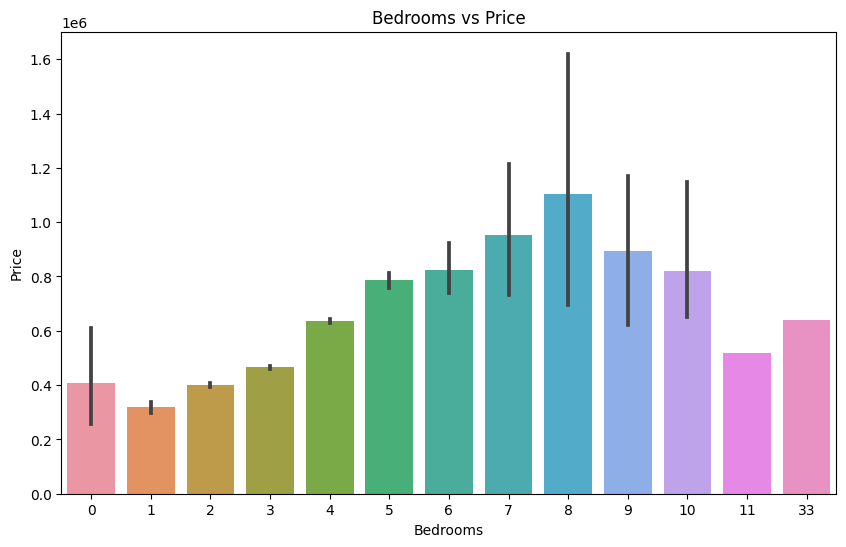

In [24]:
# Bar chart for Bedrooms vs Price
plt.figure(figsize=(10,6))
sns.barplot(x='bedrooms', y='price', data=data)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

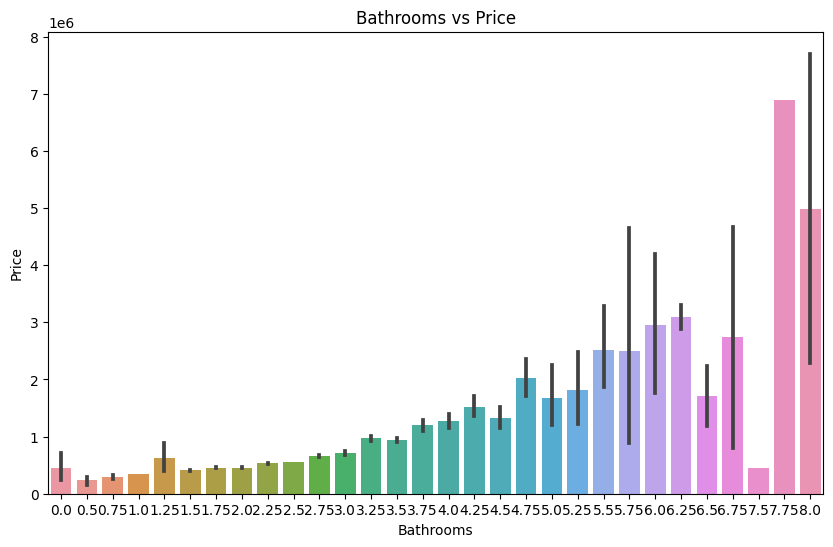

In [25]:
# Bar chart for Bathrooms vs Price
plt.figure(figsize=(10,6))
sns.barplot(x='bathrooms', y='price', data=data)
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

### **Waterfront**

In [26]:
data.groupby('waterfront')['price'].mean()

waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

The output indicates that houses with a waterfront (where 'waterfront' is 1) have a significantly higher average price (approximately 1.66 million) compared to houses without a waterfront (where 'waterfront' is 0) which have an average price of approximately 531,563.

This suggests that having a waterfront is a significant factor in house pricing, as houses with a waterfront tend to be much more expensive on average than those without.

<Axes: xlabel='waterfront', ylabel='price'>

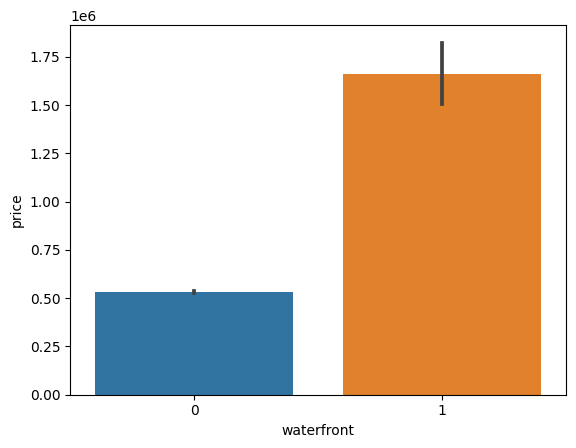

In [27]:
sns.barplot(x='waterfront', y='price', data=data)

## **Feature Selection**

In [28]:
# Select the columns
selected_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms', 'view', 'lat', 'long', 'waterfront']

# Add the target variable to the list of selected features
selected_features.append('price')

# Create a new DataFrame with the selected features
data_selected = data[selected_features]

# Show the first few rows of the new DataFrame
print(data_selected.head())


   bathrooms  sqft_living  grade  sqft_above  sqft_living15  bedrooms  view  \
0       1.00         1180      7        1180           1340         3     0   
1       2.25         2570      7        2170           1690         3     0   
2       1.00          770      6         770           2720         2     0   
3       3.00         1960      7        1050           1360         4     0   
4       2.00         1680      8        1680           1800         3     0   

       lat     long  waterfront     price  
0  47.5112 -122.257           0  221900.0  
1  47.7210 -122.319           0  538000.0  
2  47.7379 -122.233           0  180000.0  
3  47.5208 -122.393           0  604000.0  
4  47.6168 -122.045           0  510000.0  


## **Data Splitting**

In [29]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data_selected.drop('price', axis=1)
y = data_selected['price']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 17290
Test set size: 4323


## **Modeling**

In [30]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the coefficients of the model
print("Model Coefficients:", model.coef_)


Model Coefficients: [-6.07409069e+03  1.94201736e+02  7.16723063e+04  3.71712828e+00
  2.75474232e+01 -2.45950140e+04  6.13207571e+04  6.31526664e+05
 -2.57660322e+05  5.79685139e+05]


The results indicate:
1. Bathrooms: For every additional bathroom, the house price is expected to decrease by approximately $6,074, holding all else constant.

2. sqft_living: For every additional square foot of living space, the house price is expected to increase by approximately $194, holding all else constant.

3. Grade: For every additional unit increase in grade, the house price is expected to increase by approximately $71,672, holding all else constant.

4. sqft_above: For every additional square foot above ground level, the house price is expected to increase by approximately $3.71, holding all else constant.

5. sqft_living15: For every additional square foot in living space in the nearest 15 houses, the house price is expected to increase by approximately $27.54, holding all else constant.

6. Bedrooms: For every additional bedroom, the house price is expected to decrease by approximately $24,595, holding all else constant.

7. View: For every additional unit increase in view quality, the house price is expected to increase by approximately $61,320, holding all else constant.

8. Latitude (lat): For every unit increase in latitude, the house price is expected to increase by approximately $631,526, holding all else constant.

9. Longitude (long): For every unit increase in longitude, the house price is expected to decrease by approximately $257,660, holding all else constant.

10. Waterfront: If the house has a waterfront view, the house price is expected to increase by approximately $579,685, holding all else constant.


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 49767357127.38
Coefficient of determination (R^2): 0.67


These results suggest that the model has a moderate to good fit.

The Mean Squared Error (MSE) is $49,767,357,127.38. This number by itself may not mean much, but it's useful for comparing different models on the same dataset. A lower MSE indicates a better fit to the data.

The Coefficient of Determination, also known as R^2, is 0.67 (or 67%). This suggests that approximately 67% of the variability in house prices can be explained by the features.

## **Feature Engineering**

Creating new features.

In [32]:
# Size ratio
data['living_lot_ratio'] = data['sqft_living'] / data['sqft_lot']

# Size difference
data['above_basement_difference'] = data['sqft_above'] - data['sqft_living']

# Interaction between indoor and outdoor spaces
data['living_lot_interaction'] = data['sqft_living'] * data['sqft_lot']

# Age of house at the time of sale
data['house_age'] = data['date'].dt.year - data['yr_built']

# Years since renovation
data['years_since_renovation'] = data['date'].dt.year - data['yr_renovated']

# Rooms ratio
data['rooms_ratio'] = data['bedrooms'] / data['bathrooms']

# Is renovated
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


In [33]:
# Replace infinities with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Fill NaNs in each column with the median of the column
data = data.fillna(data.median())

# Select features
features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'view', 'lat', 'long', 'waterfront', 'house_age', 'is_renovated','living_lot_ratio','above_basement_difference','years_since_renovation','rooms_ratio']

X = data[features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Print the model coefficients
print("Model Coefficients:", model.coef_)

# Print the mean squared error
print("Mean squared error:", mean_squared_error(y_test, y_pred))

# Print the coefficient of determination
print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))


Model Coefficients: [-9.53888781e+04  1.42083956e+05  8.80422700e+15  9.30166357e+04
 -8.80422700e+15  4.00657112e+01  4.89655050e+04  5.28796798e+05
 -5.62449942e+04  5.70219783e+05  2.90074896e+03 -4.25421438e+06
  6.16210722e+04  8.80422700e+15 -2.14632779e+03  1.13069552e+05]
Mean squared error: 46001577885.81322
Coefficient of determination (R^2): 0.6957098934149706


<ipython-input-33-d25367cfb2db>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.median())


### **Checking For Multicollinearity**

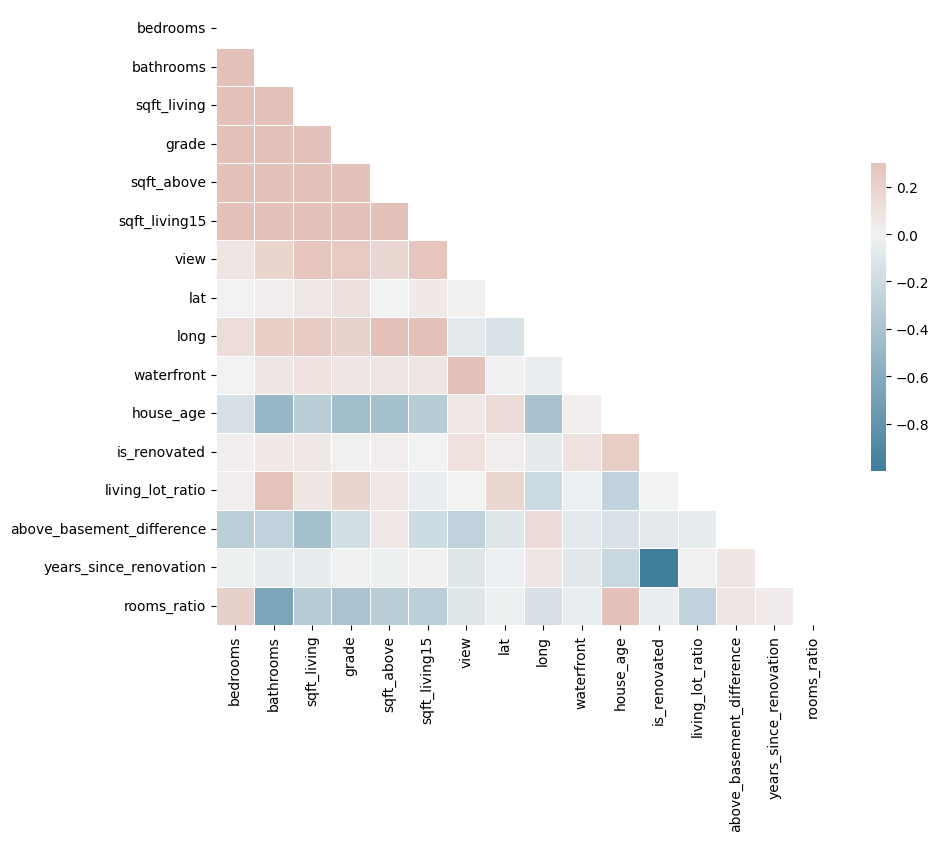

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      VIF Factor                   features
0   6.963806e+01                   bedrooms
1   8.813443e+01                  bathrooms
2            inf                sqft_living
3   1.464281e+02                      grade
4            inf                 sqft_above
5   2.787935e+01              sqft_living15
6   1.548928e+00                       view
7   1.235436e+05                        lat
8   3.639772e+05                       long
9   1.215135e+00                 waterfront
10  6.090166e+00                  house_age
11  1.248120e+04               is_renovated
12  3.243745e+00           living_lot_ratio
13           inf  above_basement_difference
14  2.879985e+05     years_since_renovation
15  4.944182e+01                rooms_ratio


Removing Some of the highly correlated predictors

In [36]:
# Select features
features = ['bedrooms', 'bathrooms', 'grade', 'sqft_living15', 'view', 'waterfront', 'house_age', 'is_renovated', 'living_lot_ratio', 'rooms_ratio']

X = data[features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Print the model coefficients
print("Model Coefficients:", model.coef_)

# Print the mean squared error
print("Mean squared error:", mean_squared_error(y_test, y_pred))

# Print the coefficient of determination
print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))


Model Coefficients: [-7.69558138e+04  2.30208326e+05  1.46543188e+05  1.06419812e+02
  4.74017438e+04  5.83755785e+05  4.24931974e+03  1.77615853e+04
  1.03946975e+05  1.36178461e+05]
Mean squared error: 56363226414.86793
Coefficient of determination (R^2): 0.627169915435758


The results show that by removing some variables that had high multicollinearity, we slightly decreased our model's predictive accuracy (R^2 went down from around 0.695 to 0.626). This is a trade-off that we often have to make: while removing these variables reduces multicollinearity, it also removes potentially useful information, which can decrease performance.

In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Let's create an interaction between quality and size
data['size_quality_interaction'] = data['grade'] * data['sqft_living']

# Create distance to a hypothetical point of interest
# Assuming the point of interest is at the mean latitude and longitude
poi_lat, poi_long = data['lat'].mean(), data['long'].mean()
data['distance_to_poi'] = np.sqrt((data['lat'] - poi_lat)**2 + (data['long'] - poi_long)**2)

# Create a binary feature for a specific zip code that has a dramatic effect on house prices
# For this example, we'll take the zip code with the highest average price
pricey_zipcode = data.groupby('zipcode')['price'].mean().idxmax()
data['in_pricey_zipcode'] = (data['zipcode'] == pricey_zipcode).astype(int)

# Log transform the target variable (price)
data['log_price'] = np.log(data['price'])

# Select features, including new features, and excluding 'price' and 'zipcode'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'view',
            'waterfront', 'house_age', 'is_renovated', 'size_quality_interaction', 'distance_to_poi',
            'in_pricey_zipcode']

X = data[features]
y = data['log_price']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)




In [38]:
# Continue with the train-test split, model fitting, prediction and evaluation...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict prices for the test set using Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
print("Ridge Model")
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R^2: %.2f' % r2_score(y_test, y_pred_ridge))

# Create and fit the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict prices for the test set using Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
print("\nLasso Model")
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R^2: %.2f' % r2_score(y_test, y_pred_lasso))


Ridge Model
Root Mean squared error: 0.30
R^2: 0.68

Lasso Model
Root Mean squared error: 0.36
R^2: 0.54


Ridge Regression Model: The R^2 score is 0.68 which means that this model explains approximately 68% of the variability in the house prices. The root mean squared error is 0.30, meaning, on average, the model's predictions are 0.30 units away from the actual values.

Lasso Regression Model: The R^2 score is 0.54, which means that this model explains approximately 54% of the variability in the house prices. The root mean squared error is 0.36, meaning, on average, the model's predictions are 0.36 units away from the actual values.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

# Grid search for Ridge Regression
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)
print("Best Parameters for Ridge: ", ridge_regressor.best_params_)
print("Best Score for Ridge: ", ridge_regressor.best_score_)

# Grid search for Lasso Regression
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("Best Parameters for Lasso: ", lasso_regressor.best_params_)
print("Best Score for Lasso: ", lasso_regressor.best_score_)


Best Parameters for Ridge:  {'alpha': 5}
Best Score for Ridge:  -0.09049360208842508


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.702e+02, tolerance: 3.794e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.950e+02, tolerance: 3.815e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+02, tolerance: 3.806e

Best Parameters for Lasso:  {'alpha': 0.0001}
Best Score for Lasso:  -0.09049257395246688


In [40]:
# Ridge Regression with optimized alpha
ridge_opt = Ridge(alpha=5)
ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = ridge_opt.predict(X_test)

print("Ridge Regression with optimized alpha")
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_ridge_opt)))
print("R^2: %.2f" % r2_score(y_test, y_pred_ridge_opt))

# Lasso Regression with optimized alpha
lasso_opt = Lasso(alpha=0.0001)
lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = lasso_opt.predict(X_test)

print("\nLasso Regression with optimized alpha")
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_lasso_opt)))
print("R^2: %.2f" % r2_score(y_test, y_pred_lasso_opt))


Ridge Regression with optimized alpha
Root Mean squared error: 0.30
R^2: 0.68

Lasso Regression with optimized alpha
Root Mean squared error: 0.30
R^2: 0.68



Both Ridge and Lasso Regression models performed better after hyperparameter tuning, and interestingly, they yielded identical results, with an RMSE of 0.30 and an R^2 score of 0.68. This means that both models can explain 68% of the variance in the house prices, and the average prediction error is 0.30 (in the units of the target variable, 'price').

## **Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the model
forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Predict the test set results
y_pred_forest = forest.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_forest)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_forest)

# Print metrics
print("Root Mean squared error: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))


Root Mean squared error: 0.26
R^2: 0.76


Random Forest Regressor has performed better than both the Linear Regression and the Ridge and Lasso regressions. The Root Mean Squared Error (RMSE) is lower at 0.26 (compared to 0.30 for both Ridge and Lasso), and the R^2 score is higher at 0.76 (compared to 0.68 for Ridge and Lasso).

This suggests that the Random Forest model is better at predicting house prices in this case.